 #

# Ma422 Project - Adult income dataset

Objective : The objective is to predict, according to some characteristics, if a person earns more than $50K per year or not


We import the librairies we need to read the datas and analyse it.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

We open and read the datas file.

In [2]:
df = pd.read_csv('src/datas/adult.csv', header=0)
df = df.sample(frac=0.2)  # Working with 20% of the dataset to avoid long time program run
#df_copy = df.copy()
print(df)

       age         workclass  fnlwgt     education  educational-num  \
46886   28           Private  183155     Bachelors               13   
28611   59  Self-emp-not-inc   70623       7th-8th                4   
14207   57           Private  289605           9th                5   
16350   25                 ?  200681  Some-college               10   
32919   35           Private  283305     Bachelors               13   
...    ...               ...     ...           ...              ...   
45108   45         Local-gov  206459       Masters               14   
7167    31           Private  192660     Assoc-voc               11   
45910   39           Private  706180     Bachelors               13   
26075   36           Private  111128     Bachelors               13   
21053   66         Local-gov  222810  Some-college               10   

           marital-status       occupation    relationship   race  gender  \
46886  Married-civ-spouse   Prof-specialty         Husband  White    M

## 1 - Quick dataset analysis

Now that the dataset is imported in the jupyter file, we can start exploring, digging in the datas to see what it is composed of, understand the variables in it, the possible links between them, find the target etc. This step is very important because it allows the user to understand the meaning of datasets, see if information has to be changed, or removed and also start thinking about how datas should be used with the future implemented model.

A) Dataset cleaning and verifications



First, we check if there are repetitions of observations in the dataset. If yes, we erase them with the method `drop_duplicates` from `pandas` library.

In [3]:
df = df.drop_duplicates()
print(df)

       age         workclass  fnlwgt     education  educational-num  \
46886   28           Private  183155     Bachelors               13   
28611   59  Self-emp-not-inc   70623       7th-8th                4   
14207   57           Private  289605           9th                5   
16350   25                 ?  200681  Some-college               10   
32919   35           Private  283305     Bachelors               13   
...    ...               ...     ...           ...              ...   
45108   45         Local-gov  206459       Masters               14   
7167    31           Private  192660     Assoc-voc               11   
45910   39           Private  706180     Bachelors               13   
26075   36           Private  111128     Bachelors               13   
21053   66         Local-gov  222810  Some-college               10   

           marital-status       occupation    relationship   race  gender  \
46886  Married-civ-spouse   Prof-specialty         Husband  White    M

In [4]:
# Remplace "?" by NaN
df.replace(' ?', np.nan, inplace=True)

Then, we remove them in order to have valid datas to send to the model.
We will use the method `isna` from `pandas` library to list the missing values.

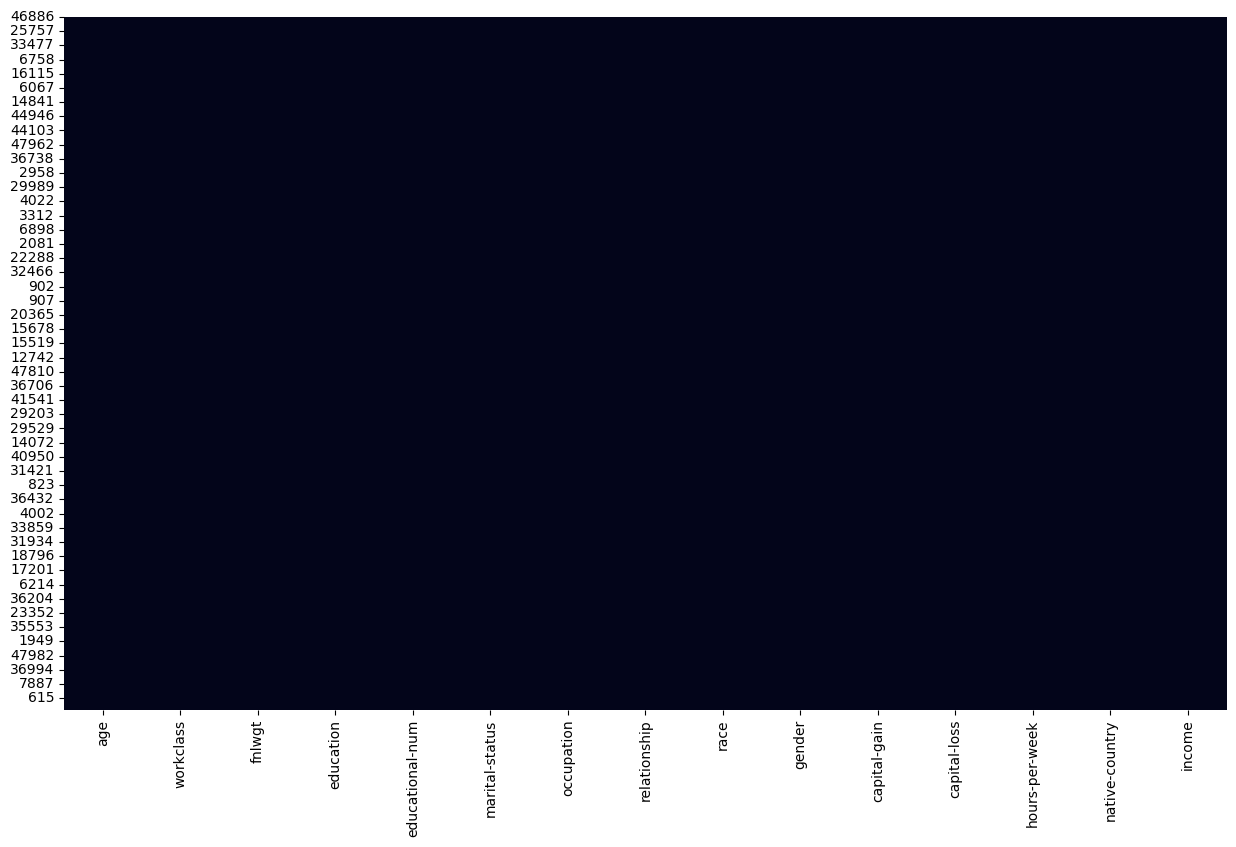

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64


In [5]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.isna(), cbar=False)
plt.show()

percentageOfNaNValues = (df.isna().sum() / df.shape[0]).sort_values(ascending=True)

print(percentageOfNaNValues)  # Normalized values between O and 1

B) Analysis the dataset

In [6]:
columnNames = df.columns
datasetShape = df.shape
variablesTypes = df.dtypes
variablesTypesCount = df.dtypes.value_counts()

print('Column names :', columnNames, '\n')
print('Dataset Shape :', datasetShape, '\n')
print('Variables Types :', variablesTypes, '\n')
print('Variables Types Count :', variablesTypesCount)

Column names : Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object') 

Dataset Shape : (9767, 15) 

Variables Types : age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object 

Variables Types Count : object    9
int64     6
dtype: int64


C) Analysis of the target variable

Repartition of the target :
 <=50K    7399
>50K     2368
Name: income, dtype: int64

Type of this variable: object


<AxesSubplot:ylabel='income'>

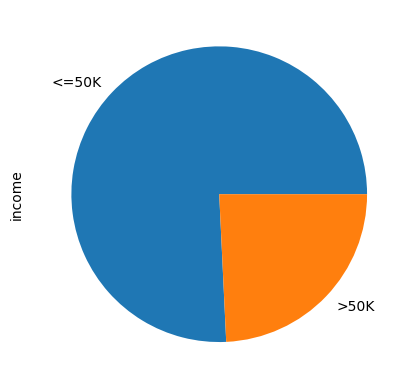

In [7]:
count_target = df['income'].value_counts()
target_type = df['income'].dtype

print('Repartition of the target :\n', count_target)
print('\nType of this variable:', target_type)
count_target.plot.pie()

## 2 - Pre-processing

In [8]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Pre-processing of the variables

In [9]:
# LabelEncoding
encoder = preprocessing.LabelEncoder()
features = ['workclass', 'education', 'occupation', 'race', 'gender', 'native-country', 'income','marital-status','relationship']
df[features] = df[features].apply(encoder.fit_transform)
print(df)

       age  workclass  fnlwgt  education  educational-num  marital-status  \
46886   28          4  183155          9               13               2   
28611   59          6   70623          5                4               2   
14207   57          4  289605          6                5               4   
16350   25          0  200681         15               10               4   
32919   35          4  283305          9               13               4   
...    ...        ...     ...        ...              ...             ...   
45108   45          2  206459         12               14               2   
7167    31          4  192660          8               11               4   
45910   39          4  706180          9               13               0   
26075   36          4  111128          9               13               2   
21053   66          2  222810         15               10               0   

       occupation  relationship  race  gender  capital-gain  capital-loss  

**Correlation matix**

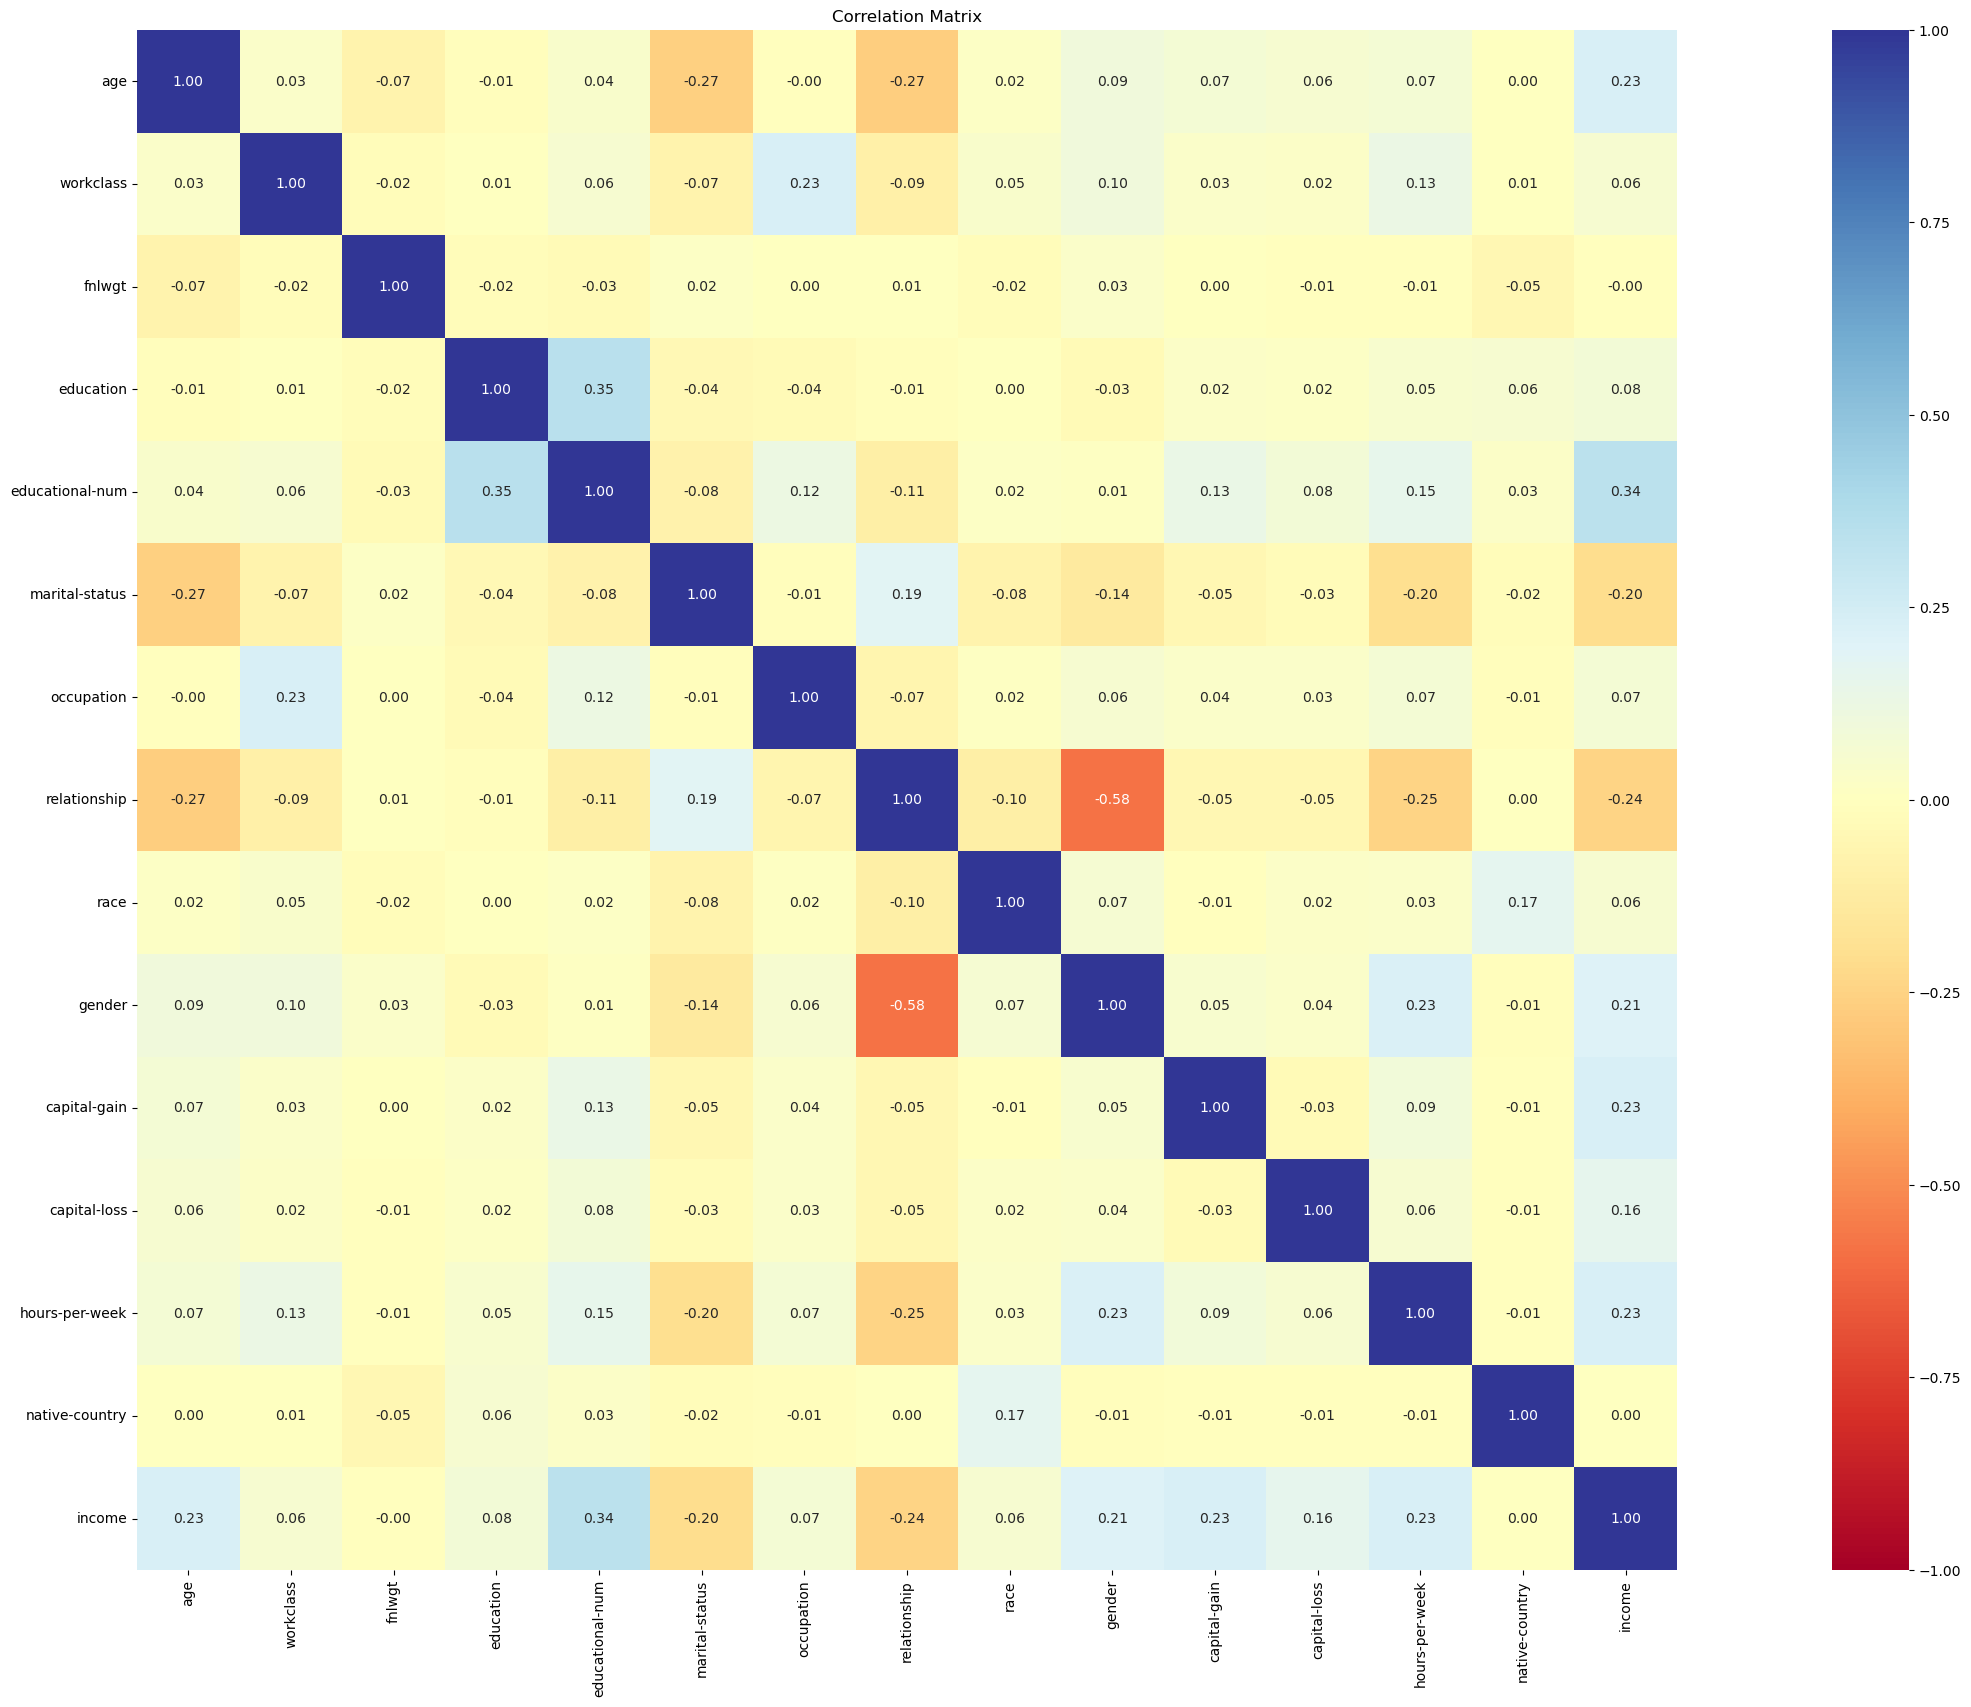

In [10]:
# Compute the correlation matrix
corr_mat = df.corr()

# Set up the figure
fig, ax = plt.subplots(figsize=(40, 20))

# Create the heatmap
sns.heatmap(corr_mat, cmap='RdYlBu', annot=True, fmt='.2f', vmin=-1, vmax=1, square=True, ax=ax)

# Set the title
ax.set_title('Correlation Matrix')

# Show the plot
plt.show()

Dropping the useless features.

In [11]:
df = df.drop(['workclass','occupation','native-country','race', 'fnlwgt'], axis=1)
print(df)

       age  education  educational-num  marital-status  relationship  gender  \
46886   28          9               13               2             0       1   
28611   59          5                4               2             0       1   
14207   57          6                5               4             1       1   
16350   25         15               10               4             3       1   
32919   35          9               13               4             1       0   
...    ...        ...              ...             ...           ...     ...   
45108   45         12               14               2             0       1   
7167    31          8               11               4             4       0   
45910   39          9               13               0             4       0   
26075   36          9               13               2             0       1   
21053   66         15               10               0             2       0   

       capital-gain  capital-loss  hour

We can finally build the matrices X and y.

In [12]:
X = df.drop(['income'], axis=1)
y = df['income']

print(X)
print(y)

# Samples for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)
print(X_train.shape)
print(X_test.shape)

       age  education  educational-num  marital-status  relationship  gender  \
46886   28          9               13               2             0       1   
28611   59          5                4               2             0       1   
14207   57          6                5               4             1       1   
16350   25         15               10               4             3       1   
32919   35          9               13               4             1       0   
...    ...        ...              ...             ...           ...     ...   
45108   45         12               14               2             0       1   
7167    31          8               11               4             4       0   
45910   39          9               13               0             4       0   
26075   36          9               13               2             0       1   
21053   66         15               10               0             2       0   

       capital-gain  capital-loss  hour

## 3 - Ensemble learning methods

#### A) Bagging method

In [13]:
from collections import Counter
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

We can try several methods and compare their performances.


Bagging method from scratch.

In [14]:
def BaggingScratch(X_train, y_train, X_test, base_estimator, n_estimators=100):
    y_pred = np.zeros((X_test.shape[0],
                       n_estimators))  # Initialization of the array which will store all the predictions for n estimators

    for i in range(n_estimators):
        num = np.random.choice(X_train.index.values, size=X_train.shape[0], replace=True)  # Resample with replacement
        X_bstr = X_train.loc[num]  # Access to the row which has index num
        y_bstr = y_train.loc[num]  # Access to the column which has index num
        base_estimator.fit(X_bstr, y_bstr)  # Fitting with a base_estimator
        y_pred[:, i] = base_estimator.predict(X_test)  # Writing the predictions results in y_pred array

    # Aggregate the predictions using majority voting
    y_pred_majority = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        y_pred_i = y_pred[i, :]
        c = Counter(y_pred_i)  # Read all the values in y_pred_i
        y_pred_majority[i] = c.most_common(1)[0][
            0]  # Getting the most common element and its count (passing 1 as argument and [0][0] to get the most common element)

    return y_pred_majority


knn = KNeighborsClassifier()
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
y_pred_knn = BaggingScratch(X_train=X_train, y_train=y_train, X_test=X_test, base_estimator=knn)
y_pred_lr = BaggingScratch(X_train=X_train, y_train=y_train, X_test=X_test, base_estimator=lr)
y_pred_dtc = BaggingScratch(X_train=X_train, y_train=y_train, X_test=X_test, base_estimator=dtc)
# number of estimators is set to 100 by default

accuracyScratch_KNN = accuracy_score(y_test, y_pred_knn)
accuracyScratch_LR = accuracy_score(y_test, y_pred_lr)
accuracyScratch_DTC = accuracy_score(y_test, y_pred_dtc)
print('Accuracy for Bagging from Scratch with KNN :', accuracyScratch_KNN)
print('Accuracy for Bagging from Scratch with LR :', accuracyScratch_LR)
print('Accuracy for Bagging from Scratch with DTC :', accuracyScratch_DTC)

Accuracy for Bagging from Scratch with KNN : 0.8375980893892869
Accuracy for Bagging from Scratch with LR : 0.8027976799727056
Accuracy for Bagging from Scratch with DTC : 0.8324803821221426


Bagging method using scikit-learn.

- We, first, try the method with the KNN estimator, as it is a widely used supervised learning method.

In [15]:
# Bagging KNN
# Defining different values of n_estimators to try
n_estimators = [10, 20, 50, 100, 200]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [KNeighborsClassifier()]}

# Performing Grid Search to find the best value of n_estimators for the bagging classifier
model1_KNN = GridSearchCV(BaggingClassifier(), param_grid=param_grid)
model1_KNN.fit(X_train, y_train)
model1_KNN.predict(X_test)
accuracy1 = model1_KNN.score(X_test, y_test)

print("Bagging KNN")
print("Best value of n_estimators:", model1_KNN.best_params_['n_estimators'])
print("Accuracy for bagging with KNN:", accuracy1)

Bagging KNN
Best value of n_estimators: 100
Accuracy for bagging with KNN: 0.8396451722961447


We can compare with the single method to see the results between the ensemble method and the single method used as estimator.

In [16]:
# Single KNN
# Defining different values of n_neighbors to try
n_neighbors = [i for i in range(1, 27, 2)]

# loop over different values of n_neighbors and evaluate the score to select the hyperparameters with high score
best_score = 0
best_k = 0
for k in n_neighbors:
    # For each value of n_neighbors, we execute a model prediction and look at its accuracy.
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    model.predict(X_test)
    score = model.score(X_test, y_test)
    if score > best_score:  # The parameters with the best accuracy are stored into variables
        best_score = score
        best_k = k

model2_KNN = KNeighborsClassifier(n_neighbors=best_k)
model2_KNN.fit(X_train, y_train)
model2_KNN.predict(X_test)
accuracy2 = model2_KNN.score(X_test, y_test)

print("\nSingle KNN")
print("Best value of k:", best_k)
print("Accuracy with single KNN:", accuracy2)


Single KNN
Best value of k: 11
Accuracy with single KNN: 0.8427157966564313


In [17]:
if (accuracy1 > accuracy2):
    print('\nThe bagging method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('\nThe single method has a better accuracy than the bagging method.')
elif (accuracy1 == accuracy2):
    print('The single method and the bagging method as same accuracies.')
print('The difference of accuracies between the single method and the bagging is :', abs(accuracy2 - accuracy1))


The single method has a better accuracy than the bagging method.
The difference of accuracies between the single method and the bagging is : 0.0030706243602866


- We try the bagging method with another estimator : Logistic Regression

In [18]:
# Bagging Logistic Regression
# Defining different values of n_estimators to try
n_estimators = [10, 50, 100, 200]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [LogisticRegression()]}

model1_LR = GridSearchCV(BaggingClassifier(),
                         param_grid=param_grid)  # Performing Grid Search to find the best parameters for the Bagging Classifier
model1_LR.fit(X_train, y_train)
model1_LR.predict(X_test)
accuracy1 = model1_LR.score(X_test, y_test)

print("Bagging LR")
print("Best value of n_estimators for Logistic Regression:", model1_LR.best_params_['n_estimators'])
print("Accuracy for bagging with Logistic Regression:", accuracy1)

Bagging LR
Best value of n_estimators for Logistic Regression: 100
Accuracy for bagging with Logistic Regression: 0.8014329580348004


We compare the bagging method with LR estimator with the single LR method

In [19]:
# Single Logistic Regression
# Defining the parameter grid for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

model2_LR = GridSearchCV(LogisticRegression(),
                         param_grid=param_grid)  # Performing Grid Search to find the best parameters for Logistic Regression
model2_LR.fit(X_train, y_train)
model2_LR.predict(X_test)
accuracy2 = model2_LR.score(X_test, y_test)

print("\nSingle LR")
print("Best parameters:", model2_LR.best_params_)
print("Accuracy for Logistic Regression:", accuracy2)



Single LR
Best parameters: {'C': 100, 'solver': 'liblinear'}
Accuracy for Logistic Regression: 0.8222449675878539


In [20]:
if (accuracy1 > accuracy2):
    print('\nThe bagging method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('\nThe single method has a better accuracy than the bagging method.')
elif (accuracy1 == accuracy2):
    print('The single method and the bagging method as same accuracies.')
print('The difference of accuracies between the single method and the bagging is :', abs(accuracy2 - accuracy1))


The single method has a better accuracy than the bagging method.
The difference of accuracies between the single method and the bagging is : 0.020812009553053512


- We can test the ensemble method on a last estimator which is the Decision Tree Classifier (DTC) which is the method used by default on most of ensemble learning methods.

In [21]:
# Bagging Decision Tree Classifier (default method on Scikit-Learn)
# Defining different values of n_estimators to try
n_estimators = [10, 50, 100, 200]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [DecisionTreeClassifier()]}

model1_DTC = GridSearchCV(BaggingClassifier(),
                          param_grid=param_grid)  # Performing Grid Search to find the best parameters for the Bagging Classifier
model1_DTC.fit(X_train, y_train)
model1_DTC.predict(X_test)
accuracy1 = model1_DTC.score(X_test, y_test)

print("Bagging DTC")
print("Best value of n_estimators for Decision Tree Classifier:", model1_DTC.best_params_['n_estimators'])
print("Accuracy for bagging with Decision Tree Classifier:", accuracy1)

Bagging DTC
Best value of n_estimators for Decision Tree Classifier: 10
Accuracy for bagging with Decision Tree Classifier: 0.8297509382463323


Let's compare the result of the bagging with DTC method and the single DTC method:

In [22]:
# Single Decision Tree classifier
model2_DTC = DecisionTreeClassifier()
model2_DTC.fit(X_train, y_train)
model2_DTC.predict(X_test)
accuracy2 = model2_DTC.score(X_test, y_test)

print("\nSingle DTC")
print("Accuracy for Decision Tree Classifier:", accuracy2)


Single DTC
Accuracy for Decision Tree Classifier: 0.8140566359604231


In [23]:
if (accuracy1 > accuracy2):
    print('\nThe bagging method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('\nThe single method has a better accuracy than the bagging method.')
elif (accuracy1 == accuracy2):
    print('The single method and the bagging method as same accuracies.')
print('The difference of accuracies between the single method and the bagging is :', abs(accuracy2 - accuracy1))


The bagging method has a better accuracy than the single method.
The difference of accuracies between the single method and the bagging is : 0.01569430228590918


Making a prediction on a new observation ...

In [24]:
# WRONG ENCODING !!
"""# Prediction on a new observation
features_name = ['age', 'workclass', 'education', 'occupation', 'race', 'gender', 'capital-gain', 'capital-loss', 'native-country']
newPerson_df = pd.DataFrame(data=[[32, 'Local-gov', 'Some-college', 'Protective-serv', 'White', 'Male', 0, 0, 'United-States']], columns=features_name)
newPerson_df = newPerson_df.apply(lambda x: encoder.fit_transform(x.astype(str)))
print(newPerson_df)

pred_BaggingKNN = model2_KNN.predict(newPerson_df)
if pred_BaggingKNN == 0:
    pred_BaggingKNN = 'Earn less than $50K'
elif pred_BaggingKNN == 1:
    pred_BaggingKNN = 'Earn more than $50K'
print("Prediction Bagging KNN:", pred_BaggingKNN)

pred_BaggingLR = model2_LR.predict(newPerson_df)
if pred_BaggingLR == 0:
    pred_BaggingLR = 'Earn less than $50K'
elif pred_BaggingLR == 1:
    pred_BaggingLR = 'Earn more than $50K'
print("Prediction Bagging LR:", pred_BaggingLR)"""

'# Prediction on a new observation\nfeatures_name = [\'age\', \'workclass\', \'education\', \'occupation\', \'race\', \'gender\', \'capital-gain\', \'capital-loss\', \'native-country\']\nnewPerson_df = pd.DataFrame(data=[[32, \'Local-gov\', \'Some-college\', \'Protective-serv\', \'White\', \'Male\', 0, 0, \'United-States\']], columns=features_name)\nnewPerson_df = newPerson_df.apply(lambda x: encoder.fit_transform(x.astype(str)))\nprint(newPerson_df)\n\npred_BaggingKNN = model2_KNN.predict(newPerson_df)\nif pred_BaggingKNN == 0:\n    pred_BaggingKNN = \'Earn less than $50K\'\nelif pred_BaggingKNN == 1:\n    pred_BaggingKNN = \'Earn more than $50K\'\nprint("Prediction Bagging KNN:", pred_BaggingKNN)\n\npred_BaggingLR = model2_LR.predict(newPerson_df)\nif pred_BaggingLR == 0:\n    pred_BaggingLR = \'Earn less than $50K\'\nelif pred_BaggingLR == 1:\n    pred_BaggingLR = \'Earn more than $50K\'\nprint("Prediction Bagging LR:", pred_BaggingLR)'

Global observations :

#### B) Boosting method

Boosting method from scratch

In [25]:
# Importation of libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [26]:
def BoostingScratch(X_train, y_train, X_test, y_test, base_estimator, n_estimators=100):
    Evaluation = pd.DataFrame(y_train.copy())
    Evaluation['weights'] = 1 / X_test.shape[0]  # Set the initial weights w = 1/N
    # Run the boosting algorithm by creating T "weighted models"

    alphas = []
    models = []

    for t in range(n_estimators):
        # Train the Decision Stump(s)
        model = base_estimator.fit(X_train, y_train, sample_weight=np.array(Evaluation['weights']))

        # Append the single weak classifiers to a list which is later on used to make the weighted decision
        models.append(model)
        predictions = model.predict(X_train)
        score = model.score(X_train, y_train)

        # Add values to the Evaluation DataFrame
        Evaluation['predictions'] = predictions
        Evaluation['evaluation'] = np.where(Evaluation['predictions'] == Evaluation['income'], 1, 0)
        Evaluation['misclassified'] = np.where(Evaluation['predictions'] != Evaluation['income'], 1, 0)

        # Calculate the misclassification rate and accuracy
        accuracy = sum(Evaluation['evaluation']) / len(Evaluation['evaluation'])
        misclassification = sum(Evaluation['misclassified']) / len(Evaluation['misclassified'])

        # Caclulate the error
        err = np.sum(Evaluation['weights'] * Evaluation['misclassified']) / np.sum(Evaluation['weights'])

        # Calculate the alpha values
        alpha = np.log((1 - err) / err)
        alphas.append(alpha)

        # Update the weights wi --> These updated weights are used in the sample_weight parameter for the training of the next decision stump.
        Evaluation['weights'] *= np.exp(alpha * Evaluation['misclassified'])

        # With each model in the self.model list, make a prediction
        accuracy = []
        predictions = []

        for alpha, model in zip(alphas, models):
            prediction = alpha * model.predict(X_test)
            predictions.append(prediction)
            accuracy.append(
                np.sum(np.sign(np.sum(np.array(predictions), axis=0)) == y_test.values) / len(predictions[0]))

        predictions = np.sign(np.sum(np.array(predictions), axis=0))

        return predictions


lr = LogisticRegression()
dtc = DecisionTreeClassifier()
y_pred_lr = BoostingScratch(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, base_estimator=lr)
y_pred_dtc = BoostingScratch(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, base_estimator=dtc)
# number of estimators is set to 100 by default

accuracyScratch_LR = accuracy_score(y_test, y_pred_lr)
accuracyScratch_DTC = accuracy_score(y_test, y_pred_dtc)
print('Accuracy for Boosting from Scratch with LR :', accuracyScratch_LR)
print('Accuracy for Boosting from Scratch with DTC :', accuracyScratch_DTC)

Accuracy for Boosting from Scratch with LR : 0.8096212896622313
Accuracy for Boosting from Scratch with DTC : 0.8120095530535654


Boosting method using Scikit-Learn

- The first estimator we use is the Logistic Regression

In [27]:
# Boosting Logistic Regression
# define the range of values of n_estimators to try
n_estimators = [10, 50, 100, 200]

# define the parameter grid for the bagging classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [LogisticRegression()]}

# perform grid search to find the best value of n_estimators for the bagging classifier
model = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid)
model.fit(X_train, y_train)
model.predict(X_test)
accuracy1 = model.score(X_test, y_test)

print("\nBoosting LR")
print("Best value of n_estimators for Logistic Regression:", model.best_params_['n_estimators'])
print("Accuracy for boosting with Logistic Regression:", accuracy1)


Boosting LR
Best value of n_estimators for Logistic Regression: 200
Accuracy for boosting with Logistic Regression: 0.8171272603207097


We can compare the boosting results with the single method results :

In [28]:
# Single Logistic Regression
# define the parameter grid for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

# perform grid search to find the best parameters for logistic regression
model = GridSearchCV(LogisticRegression(), param_grid=param_grid)
model.fit(X_train, y_train)
model.predict(X_test)
accuracy2 = model.score(X_test, y_test)

print("Single LR")
print("Best parameters:", model.best_params_)
print("Accuracy for Logistic Regression:", accuracy2)

Single LR
Best parameters: {'C': 100, 'solver': 'liblinear'}
Accuracy for Logistic Regression: 0.8222449675878539


In [29]:
if (accuracy1 > accuracy2):
    print('\nThe boosting method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('\nThe single method has a better accuracy than the boosting method.')
elif (accuracy1 == accuracy2):
    print('The single method and the boosting method as same accuracies.')
print('The difference of accuracies between the single method and the boosting is :', abs(accuracy2 - accuracy1))


The single method has a better accuracy than the boosting method.
The difference of accuracies between the single method and the boosting is : 0.0051177072671442225


- The second estimator used is the Decision Tree Classifier

In [30]:
# Boosting Decision tree classifier
# Defining different values of n_estimators to try
n_estimators = [10, 20, 50, 100, 200]
learning_rate = [0.01, 0.1, 1.0]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

# Performing Grid Search to find the best value of n_estimators for the bagging classifier
model = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid)
model.fit(X_train, y_train)
model.predict(X_test)
accuracy1 = model.score(X_test, y_test)

print("\nBoosting DTC")
print("Best value of n_estimators:", model.best_params_['n_estimators'])
print("Best value of learning_rate:", model.best_params_['learning_rate'])
print("Accuracy for boosting with Decision tree classifier:", accuracy1)


Boosting DTC
Best value of n_estimators: 200
Best value of learning_rate: 1.0
Accuracy for boosting with Decision tree classifier: 0.8567041965199591


Comparison with the single DTC method

In [31]:
# Single Decision tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.predict(X_test)
accuracy2 = model.score(X_test, y_test)

print("Single DTC")
print("Best value of k:", best_k)
print("Accuracy with single Decision tree classifier:", accuracy2)

Single DTC
Best value of k: 11
Accuracy with single Decision tree classifier: 0.8103036506311839


In [32]:
if (accuracy1 > accuracy2):
    print('\nThe boosting method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('\nThe single method has a better accuracy than the boosting method.')
elif (accuracy1 == accuracy2):
    print('The single method and the boosting method as same accuracies.')
print('The difference of accuracies between the single method and the boosting is :', abs(accuracy2 - accuracy1))


The boosting method has a better accuracy than the single method.
The difference of accuracies between the single method and the boosting is : 0.04640054588877518


Global observations :

## C) Stacking method

We import the needed libraries

In [33]:
import pandas as pd
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.ensemble as se

Firstly, we add some prediction functions

In [34]:
KNC = KNeighborsClassifier(n_neighbors=2)  # initialising KNeighbors Classifier
model_kNeighborsClassifier = KNC.fit(X_train, y_train)  # fitting Training Set
pred_knc = model_kNeighborsClassifier.predict(X_test)  # Predicting on test dataset
acc_knc = accuracy_score(y_test, pred_knc)  # evaluating accuracy score
print('Accuracy score of the KNeighbors Classifier is:', acc_knc)

###

NB = GaussianNB()  # initialising Naive Bayes
model_NaiveBayes = NB.fit(X_train, y_train)
pred_nb = model_NaiveBayes.predict(X_test)
acc_nb = accuracy_score(y_test, pred_nb)
print('Accuracy of the Naive Bayes Classifier:', acc_nb)

###

SGD = SGDClassifier(loss='log', random_state=0)
model_SGD_Classifier = SGD.fit(X_train, y_train)  # fitting Training Set
pred_sgd = model_SGD_Classifier.predict(X_test)  # Predicting on test dataset
acc_sgd = accuracy_score(y_test, pred_sgd)  # evaluating accuracy score
print('Accuracy score of the SGD Classifier is:', acc_sgd)

###

TREE = DecisionTreeClassifier(random_state=0)
model_Tree = TREE.fit(X_train, y_train)
pred_tree = model_Tree.predict(X_test)
acc_tree = accuracy_score(y_test, pred_tree)
print('Accuracy of the Decision Tree Classifier:', acc_tree)

Accuracy score of the KNeighbors Classifier is: 0.839986352780621
Accuracy of the Naive Bayes Classifier: 0.7966564312521324
Accuracy score of the SGD Classifier is: 0.7966564312521324
Accuracy of the Decision Tree Classifier: 0.8130330945069942


Then, we put these functions into a classifier (here the Stacking classifier) and train it.

In [35]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers=[KNC, NB, SGD, TREE], meta_classifier=lr, use_probas=True,
                               use_features_in_secondary=True)  #Main StacklingClassifier from mlxtend library

model_stack = clf_stack.fit(X_train, y_train)  # training of stacked model
pred_stack = model_stack.predict(X_test)  # predictions on test data using stacked model

acc_stack = accuracy_score(y_test, pred_stack)  # evaluating accuracy
print('Accuracy score of the Stacked model:', acc_stack)

Accuracy score of the Stacked model: 0.827021494370522


Stacking method using scikit-learn

In [36]:
model_stack_bis = se.StackingClassifier([('SGD', SGD),
                                         ('Tree', TREE),
                                         ('KNC', KNC)],
                                        final_estimator=KNeighborsClassifier())

model_stack_bis.fit(X_train, y_train)
score = model_stack_bis.score(X_test, y_test)

print("Accuracy of the Stacking model (using scikit-learn):", score)

Accuracy of the Stacking model (using scikit-learn): 0.8280450358239508


Global observations :